In [1]:
# Fix imports when running from notebooks/ folder
import sys
from pathlib import Path

project_root = Path.cwd().parent 
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

print(f"Added to path: {project_root}")

%load_ext autoreload
%autoreload 2

Added to path: /Users/elshaday/DEV/10Academy/customer-experience-analytics-week2


In [2]:
from src.data import DataManager
from tabulate import tabulate
import matplotlib.pyplot as plt

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/elshaday/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/elshaday/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# Scrape and Clean Data > save to csv > load df
dm = DataManager()
dm.scrape_reviews()
reviews_df = dm.load_data()

Saved data to ../data/raw/reviews_data.csv
Removed 0 rows with missing and duplicate values.
Removed 78 rows with Ethiopic reviews.
Saved cleaned review under clean_review column
Saved data to ../data/processed/cleaned_reviews_data.csv


In [4]:
print(tabulate(reviews_df.head(), headers="keys", tablefmt="psql"))


+----+--------------------------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------+---------------------+--------+-------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|    | review_id                            | review                                                                                                                                                                                                       

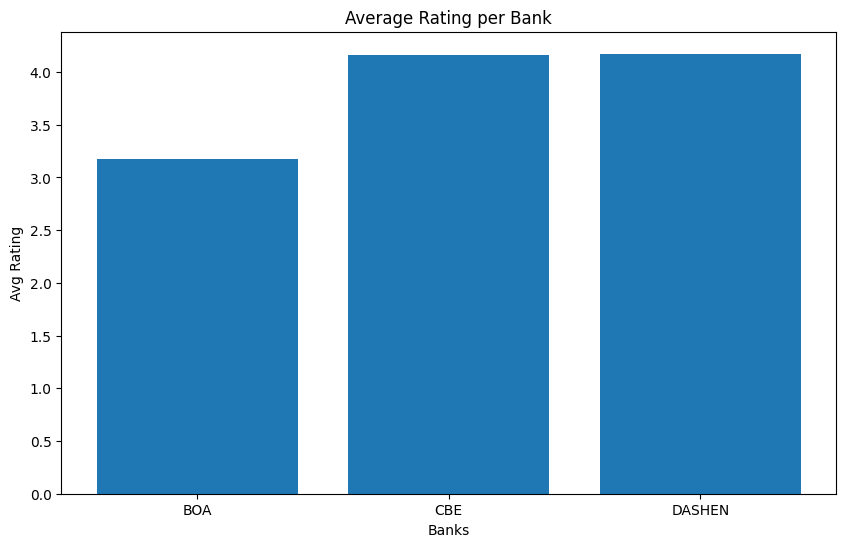

In [5]:
# Visualize rating by bank

avg_rating = reviews_df.groupby('bank')["rating"].mean().sort_values()

plt.figure(figsize=(10, 6))
plt.bar(avg_rating.index.str.upper(), avg_rating.values)
plt.xlabel("Banks")
plt.ylabel("Avg Rating")
plt.title("Average Rating per Bank")


plt.show()

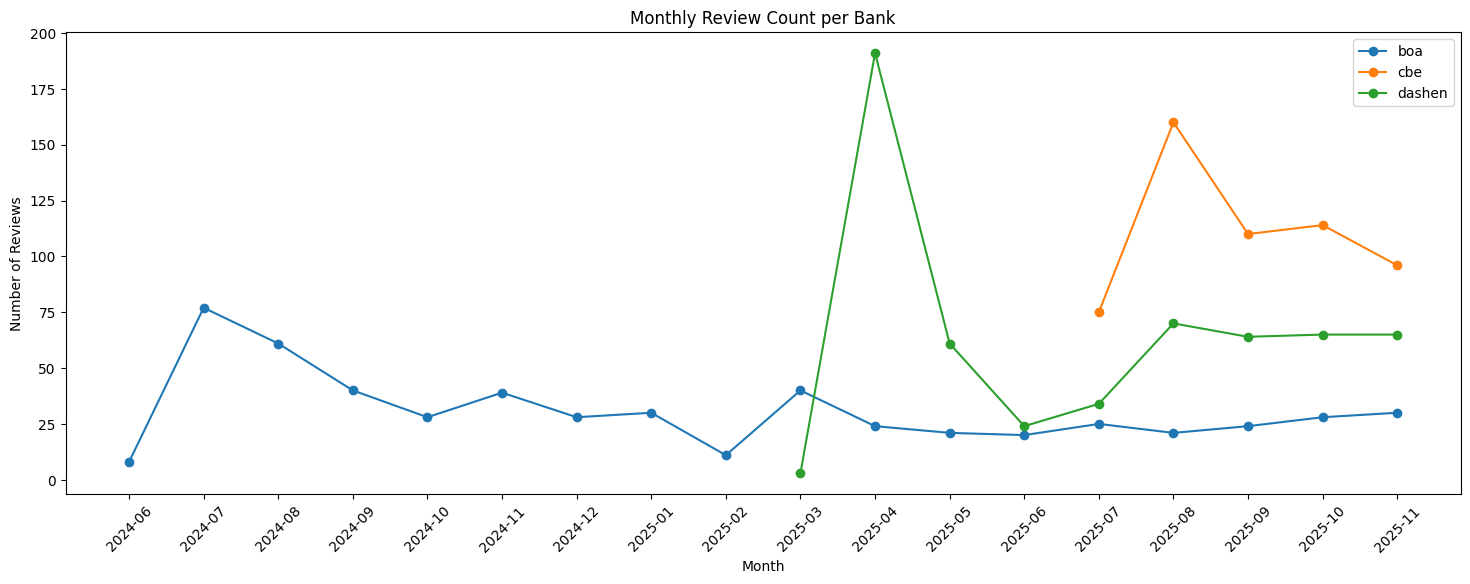

In [6]:
# Time Series

reviews_df["year_month"] = reviews_df["date"].dt.to_period("M").astype(str)

# Monthly reviews count per bank
monthly_counts = (
    reviews_df.groupby(["bank", "year_month"])["clean_review"]
    .count()
    .reset_index(name="review_count")
)


plt.figure(figsize=(18, 6))

for bank in monthly_counts["bank"].unique():
    data = monthly_counts[monthly_counts["bank"] == bank]
    plt.plot(data["year_month"], data["review_count"], marker="o", label=bank)

plt.title("Monthly Review Count per Bank")
plt.xlabel("Month")
plt.ylabel("Number of Reviews")
plt.tick_params(axis="x", rotation=45)
plt.legend()